- 데이터 준비하기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/movie_data_Name.csv')
df.head(1)

,title,budget,genres,country,charactor,director,vote_score,vote_count,vote_weight
0,토르: 러브 앤 썬더,250000000,"['액션', '모험', '판타지']",['United States of America'],Christian Bale,Taika Waititi,6.778,1802,10.000812


- 데이터 분석

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'text.color': "white",
                    'axes.labelcolor': "white",
                     'xtick.color': "white",
                     'ytick.color': "white"
                     })

- vote_weight(평가 가중치) 분석

In [4]:
df.vote_weight.describe()

count    5128.000000
mean       25.630412
std       101.883917
min         5.525633
25%         8.809991
50%        11.189106
75%        17.365922
max      1491.941186
Name: vote_weight, dtype: float64

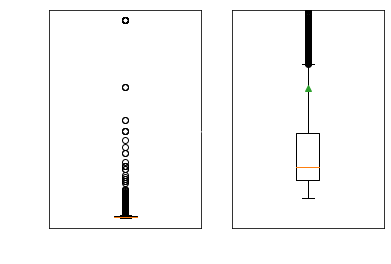

In [5]:
# BOXPLOT 중앙값 : 11.155580
plt.subplot(1, 2, 1)
plt.boxplot(df.vote_weight)
plt.xlabel("Vote_weight")
plt.ylabel("Score")

plt.subplot(1, 2, 2)
plt.boxplot(df.vote_weight, showmeans=True)
plt.xlabel("Vote_weight_detail")
plt.ylabel("Score")
plt.ylim(0, 40)
plt.show()

<pre>따라서 결과값은 중앙값 기준인 약 11로 result를 0, 1로 나눈다.</pre>

- vote_weight와 genres HeatMap

In [6]:
import ast

In [7]:
# 장르에 따른 평가 가중치 값 합
genres_type = {}
temps = []
for idx in df.index :
    genres = ast.literal_eval(df.genres[idx])
    vote_weight = df.vote_weight[idx]
    for genre in  genres:
        temps.append([genre, vote_weight])
for temp in temps:
    try:
        genres_type[temp[0]] += temp[1] # dictionary에 있으면 점수 합산
    except:
        genres_type[temp[0]] = temp[1]  # dictionary에 없으면 선언 및 점수

In [8]:
df_genreVote_total = pd.DataFrame(list(genres_type.items()), columns=['genres', 'vote_weight_total'])

In [9]:
df_genreVote_total

,genres,vote_weight_total
0,액션,44035.103427
1,모험,27632.888154
2,판타지,21913.979854
3,SF,20342.589676
4,가족,11152.034435
5,애니메이션,7562.563669
6,코미디,32726.972861
7,드라마,56435.807380
8,공포,21068.160191
9,스릴러,36625.497309


In [10]:
# HeapMap : 결과값이 높을수록 두변수가 높은 상관관계를 갖고 있다는 것.
# genres 종류에 따라 나온 결과 값을 데이터프레임 변형, 해당하는 값만 부여하고 나머지는 0으로 부여
# 가중치 값은 반올림하여 정수형으로 바꿈.
df_genreVote_each = pd.DataFrame(columns=df_genreVote_total.genres)
for idx in df.index:
    genres = ast.literal_eval(df.genres[idx])
    vote_weight = int(round(df.vote_weight[idx], 1))
    # 한 줄 0으로 초기화
    df_genreVote_each.loc[idx] = 0
    for genre in genres:
        df_genreVote_each.loc[idx][str(genre)] = vote_weight  # 한 줄 값 부여
df_genreVote_each['vote_weight'] = df.vote_weight.round(1).astype(int)

- 장르와 투표 가중치 상관관계

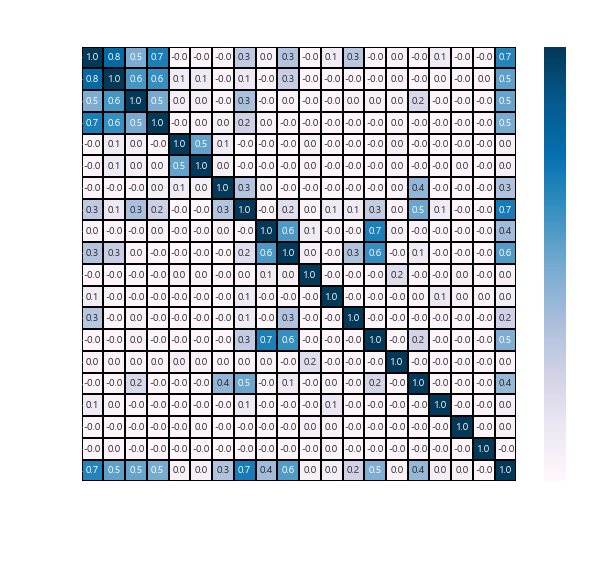

In [11]:
import seaborn as sns
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Genres of vote_weight", y = 1.05, size = 15)
sns.heatmap(df_genreVote_each.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, fmt='.1f')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [20]:
df.vote_weight.mean()

25.63041196119704

vote_weight는 평균 25, 25보다 높은 투표 가중치는 대부분 vote_score이 6이다.

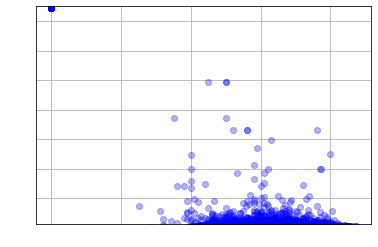

In [22]:
# 세로 : result, 세로 : vote_score
plt.plot(df.vote_score, df.vote_weight, 'bo', alpha=0.3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.ylim(25, 1500)
plt.show()

In [19]:
len(df.vote_score[df.vote_score == 0])

20

- 예산이 0~50000000 인경우 vote_weight가 25를 넘는다.

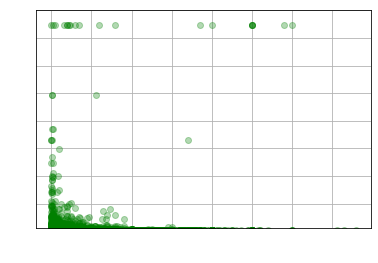

In [24]:
# 세로 : result, 세로 : vote_score
plt.plot(df.budget, df.vote_weight, 'go', alpha=0.3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.ylim(25, 1600)
plt.show()